<a href="https://colab.research.google.com/github/sipocz/XLS_Conv/blob/main/XLS_converter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [586]:
import pandas as pd
import os

In [587]:
!rm *.xlsx*

In [588]:
urlname="https://github.com/sipocz/XLS_Conv/raw/e052e5c75f5690d62793dc2f31af7d22b564e405/U113_20210705.xlsx"
urlname="https://github.com/sipocz/XLS_Conv/raw/e052e5c75f5690d62793dc2f31af7d22b564e405/U113_20210628.xlsx"
urlname="https://github.com/sipocz/XLS_Conv/raw/e052e5c75f5690d62793dc2f31af7d22b564e405/U113_20210621.xlsx"
urlname="https://github.com/sipocz/XLS_Conv/raw/e052e5c75f5690d62793dc2f31af7d22b564e405/U113_20210614.xlsx"
urlname="https://github.com/sipocz/XLS_Conv/raw/e052e5c75f5690d62793dc2f31af7d22b564e405/U113_20210607.xlsx"




_,fname= os.path.split(urlname)

In [589]:
!wget $urlname

--2021-10-01 20:39:34--  https://github.com/sipocz/XLS_Conv/raw/e052e5c75f5690d62793dc2f31af7d22b564e405/U113_20210607.xlsx
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/XLS_Conv/e052e5c75f5690d62793dc2f31af7d22b564e405/U113_20210607.xlsx [following]
--2021-10-01 20:39:34--  https://raw.githubusercontent.com/sipocz/XLS_Conv/e052e5c75f5690d62793dc2f31af7d22b564e405/U113_20210607.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5661857 (5.4M) [application/octet-stream]
Saving to: ‘U113_20210607.xlsx’

U113_20210607.xlsx  100%[===================>]   5.40M  --.-KB/s    in 0.08s   

202

In [590]:
df=pd.read_excel(fname,sheet_name=3)

In [591]:
df.columns=["Date","Value","Status"]

In [592]:
df.tail()

,Date,Value,Status
29495,2021-06-11 23:58:50,36.285957,OK
29496,2021-06-11 23:59:10,36.285957,OK
29497,2021-06-11 23:59:22,36.182953,OK
29498,2021-06-11 23:59:42,36.182953,OK
29499,True,NaN,NaN


In [593]:
df.dropna(inplace=True)

In [594]:
df.Date[0]

datetime.datetime(2021, 6, 7, 0, 0, 25)

In [595]:
#pd.to_datetime(df.Date, format="%Y-%m-%d %H:%M:%S")

In [596]:
df.index=df.Date

In [597]:
df.describe()

,Value
count,29499.000000
mean,58.158668
std,11.913623
min,24.155029
25%,58.373390
50%,59.216446
75%,67.494469
max,73.971924


In [598]:
df.Date.values[-1]

datetime.datetime(2021, 6, 11, 23, 59, 42)

In [599]:
new_range = pd.date_range(df.Date.values[0], df.Date.values[-2], freq='10S')

In [600]:
new_range

DatetimeIndex(['2021-06-07 00:00:25', '2021-06-07 00:00:35',
               '2021-06-07 00:00:45', '2021-06-07 00:00:55',
               '2021-06-07 00:01:05', '2021-06-07 00:01:15',
               '2021-06-07 00:01:25', '2021-06-07 00:01:35',
               '2021-06-07 00:01:45', '2021-06-07 00:01:55',
               ...
               '2021-06-11 23:57:45', '2021-06-11 23:57:55',
               '2021-06-11 23:58:05', '2021-06-11 23:58:15',
               '2021-06-11 23:58:25', '2021-06-11 23:58:35',
               '2021-06-11 23:58:45', '2021-06-11 23:58:55',
               '2021-06-11 23:59:05', '2021-06-11 23:59:15'],
              dtype='datetime64[ns]', length=43194, freq='10S')

In [601]:
type(df)

pandas.core.frame.DataFrame

In [602]:
df.set_index("Date",inplace=True)

In [603]:
df.head()

,Value,Status
Date,,
2021-06-07 00:00:25,31.860840,OK
2021-06-07 00:00:35,31.960022,OK
2021-06-07 00:00:55,31.960022,OK
2021-06-07 00:00:56,31.860840,OK
2021-06-07 00:01:06,31.960022,OK


In [604]:
df.head()

,Value,Status
Date,,
2021-06-07 00:00:25,31.860840,OK
2021-06-07 00:00:35,31.960022,OK
2021-06-07 00:00:55,31.960022,OK
2021-06-07 00:00:56,31.860840,OK
2021-06-07 00:01:06,31.960022,OK


In [605]:
bad_data=df[df["Status"]=="Bad Data"].index

In [606]:
bad_data

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)

In [607]:
df

,Value,Status
Date,,
2021-06-07 00:00:25,31.860840,OK
2021-06-07 00:00:35,31.960022,OK
2021-06-07 00:00:55,31.960022,OK
2021-06-07 00:00:56,31.860840,OK
2021-06-07 00:01:06,31.960022,OK
...,...,...
2021-06-11 23:58:30,36.385139,OK
2021-06-11 23:58:50,36.285957,OK
2021-06-11 23:59:10,36.285957,OK


In [608]:
#df.drop(index=bad_data,inplace=True)

In [609]:
type(df)

pandas.core.frame.DataFrame

In [610]:
df.describe()

,Value
count,29499.000000
mean,58.158668
std,11.913623
min,24.155029
25%,58.373390
50%,59.216446
75%,67.494469
max,73.971924


In [611]:
df.head()

,Value,Status
Date,,
2021-06-07 00:00:25,31.860840,OK
2021-06-07 00:00:35,31.960022,OK
2021-06-07 00:00:55,31.960022,OK
2021-06-07 00:00:56,31.860840,OK
2021-06-07 00:01:06,31.960022,OK


In [612]:
df.reset_index(inplace=True)

In [613]:
df.drop(columns=["Status"], inplace=True)

In [614]:
new_range = pd.date_range(df.index.values[0], df.index.values[-1], freq='10S')

In [615]:
new_range

DatetimeIndex(['1970-01-01'], dtype='datetime64[ns]', freq='10S')

In [616]:
df.reindex()

,Date,Value
0,2021-06-07 00:00:25,31.860840
1,2021-06-07 00:00:35,31.960022
2,2021-06-07 00:00:55,31.960022
3,2021-06-07 00:00:56,31.860840
4,2021-06-07 00:01:06,31.960022
...,...,...
29494,2021-06-11 23:58:30,36.385139
29495,2021-06-11 23:58:50,36.285957
29496,2021-06-11 23:59:10,36.285957
29497,2021-06-11 23:59:22,36.182953


In [617]:
df.set_index("Date",inplace=True)

In [618]:
df

,Value
Date,
2021-06-07 00:00:25,31.860840
2021-06-07 00:00:35,31.960022
2021-06-07 00:00:55,31.960022
2021-06-07 00:00:56,31.860840
2021-06-07 00:01:06,31.960022
...,...
2021-06-11 23:58:30,36.385139
2021-06-11 23:58:50,36.285957
2021-06-11 23:59:10,36.285957


In [619]:
index = pd.date_range('1/1/2019', periods=8, freq='T')
series = pd.Series(range(8), index=index)
series

2019-01-01 00:00:00    0
2019-01-01 00:01:00    1
2019-01-01 00:02:00    2
2019-01-01 00:03:00    3
2019-01-01 00:04:00    4
2019-01-01 00:05:00    5
2019-01-01 00:06:00    6
2019-01-01 00:07:00    7
Freq: T, dtype: int64

In [620]:
df3=df.resample("1s").mean()

In [621]:
df3.head(30)

,Value
Date,
2021-06-07 00:00:25,31.860840
2021-06-07 00:00:26,NaN
2021-06-07 00:00:27,NaN
2021-06-07 00:00:28,NaN
2021-06-07 00:00:29,NaN
2021-06-07 00:00:30,NaN
2021-06-07 00:00:31,NaN
2021-06-07 00:00:32,NaN
2021-06-07 00:00:33,NaN


In [622]:
df3.interpolate('linear',inplace=True)

In [623]:
df3

,Value
Date,
2021-06-07 00:00:25,31.860840
2021-06-07 00:00:26,31.870758
2021-06-07 00:00:27,31.880676
2021-06-07 00:00:28,31.890594
2021-06-07 00:00:29,31.900513
...,...
2021-06-11 23:59:38,36.182953
2021-06-11 23:59:39,36.182953
2021-06-11 23:59:40,36.182953


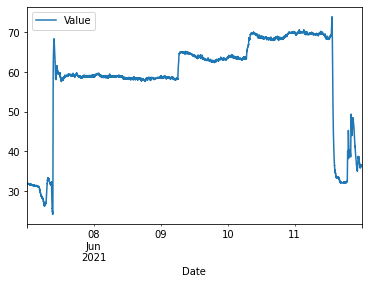

In [624]:
df3.plot();

In [625]:
tabs = pd.ExcelFile(fname).sheet_names 
print(tabs)

['AS_P113B', 'AS_PH113', 'AS_T113F', 'AS_T1131', 'AS_T1132', 'AS_T1133', 'AS_T1134', 'AS_T1135']


In [626]:
def get_data1s(fname,sheet_name):
    import pandas as pd
    df=pd.read_excel(fname,sheet_name=sheet_name)
    df.columns=["Date","Value","Status"]
    bad_data=df[df["Status"]=="Bad Data"].index
    df.drop(index=bad_data,inplace=True)
    df.dropna(inplace=True)
    df.index=df.Date
    df.set_index("Date",inplace=True)
    df.drop(columns=["Status"], inplace=True)
    dfout=df.resample("1s").mean()
    dfout.interpolate('linear',inplace=True)
    dfout=dfout.resample("10s").mean()

    return(dfout)



In [ ]:
df0=get_data1s(fname,tabs[0])

In [ ]:
df0.plot();

In [ ]:
df1=get_data1s(fname,tabs[1])

In [ ]:
df1.plot();

In [ ]:
df2=get_data1s(fname,tabs[2])

In [ ]:
df2.plot()

In [ ]:
df3=get_data1s(fname,tabs[3])

In [ ]:
df3.plot()

In [ ]:
def df_list(fname,tabs):
    out_df_list=[]
    for tabx in tabs:
        dftab=get_data1s(fname,tabx)
        dftab.plot()
        out_df_list.append(dftab)
    return out_df_list 

In [ ]:
all_df=df_list(fname,tabs)

In [ ]:
def df_concat(dflist,df_heads):
    for index,name in enumerate(df_heads):
        dflist[index].columns=[name]
    out_df=pd.concat(dflist,axis=1)
    #out_df.head=df_heads
    out_df.dropna(inplace=True)
    return(out_df)

In [ ]:


allDF=df_concat(all_df,tabs)

In [ ]:
all_df[0].head()

In [ ]:
allDF.head()

In [ ]:
allDF.to_csv("20210621.csv",sep=";")

In [ ]:
allDF.describe()

In [ ]:
# Készítsünk egy scatter plotot!
from pandas.plotting import scatter_matrix

#scatter_matrix(allDF, alpha = 0.2, figsize = (10, 10), diagonal = 'kde');

In [ ]:
allDF.head()

In [ ]:
l1=allDF["AS_T1134"] >175
aa=allDF.loc[l1]

In [ ]:
aa.index[-1]

In [ ]:
start_time =aa.index[0]    #pd.Timestamp("2021-07-06 00:00:00")
end_time   =aa.index[-1]   #pd.Timestamp("2021-07-09 00:00:00")
print(allDF.loc[start_time])
print("-"*30)
print(allDF.loc[end_time])

In [ ]:
allDF.tail()


In [ ]:
actual_df = allDF[
    (allDF.index > start_time ) &
    (allDF.index < end_time)
]

In [ ]:
actual_df.head()

In [ ]:
actual_df.describe()

In [ ]:

#scatter_matrix(actual_df, alpha = 0.2, figsize = (10, 10), diagonal = 'kde');

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
dta = actual_df.AS_P113B[:]
dta.index = actual_df.index[:]


sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=200)
plt.show()

In [ ]:
dta = actual_df.AS_PH113[:]
dta.index = actual_df.index[:]


sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=2000)
plt.show()

In [ ]:
features=tabs
from sklearn.preprocessing import StandardScaler
x = dta = actual_df.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features

In [ ]:
x

In [ ]:
from sklearn.decomposition import PCA
pca_113 = PCA(n_components=2)
principal113 = pca_113.fit_transform(x)

In [ ]:
principal113

In [ ]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of reactor 113",fontsize=20)
targets = ['P1', 'P2']
colors = x[:,1]
color = actual_df.loc[:, "AS_PH113"].values
plt.scatter(principal113[:,0],principal113[:,1] , c = color, s = 1,)
plt.colorbar()
plt.legend(targets,prop={'size': 20})

In [ ]:
pca_113.components_

array([[ 0.01670607,  0.05312135, -0.40868632, -0.44066814, -0.42976667,
        -0.43431946, -0.4122653 , -0.3039583 ],
       [ 0.21560599, -0.70138045,  0.17989372, -0.16032836, -0.24443999,
        -0.22447836,  0.00337312,  0.54162695]])

In [ ]:
print(pca_113)

In [ ]:
actual_df.plot()

In [ ]:
actual_df.AS_PH113.plot()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


In [ ]:
db=DBSCAN(eps=0.4,).fit(x)

In [ ]:
print(db.labels_)
print(max(db.labels_))

In [ ]:
!rm alma*

In [ ]:

fig=plt.figure(figsize=(20,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of reactor 113",fontsize=20)
targets = ['P1', 'P2']
colors = x[:,1]
color = db.labels_
plt.scatter(principal113[:,0],principal113[:,1] , c = color, s = 18,alpha=0.5,marker="o",)
plt.colorbar()
plt.legend(targets,prop={'size': 20})
plt.show()
fig.savefig(fname+".png")